# Literature Review

# Title: Portfolio Allocation using Random Forest

Sections:

1. Introduction

- Brief introduction to portfolio allocation.
- Goals and objectives.

2. Setup and Imports

- Import necessary libraries.
- Setup configurations (e.g., display settings).

3. Data Collection

- Download stock data using yfinance.
- Display the first few rows of the data.

4. Data Preparation

- Calculate daily returns.
- Plot the daily returns for initial visualization.

5. Feature Engineering

- Create lag features and moving averages.
- Display the first few rows of the processed data.

6. Model Training and Prediction

- Train a Random Forest model for each stock's return prediction.
- Predict future returns.

7. Portfolio Allocation

- Calculate predicted returns.
- Allocate weights based on predicted returns and other criteria.
- Evaluate the portfolio performance.

8. Conclusion

- Summarize findings.
- Discuss potential improvements and next steps.

# Pseudo Code

## Introduction
1. Introduce the project and outline goals.

### Portfolio Allocation using Random Forest
This notebook aims to allocate a portfolio of stocks using predicted returns from Random Forest models.


## Setup and Imports

1. Import libraries: yfinance, pandas, sklearn, matplotlib.
2. Configure display settings.

In [2]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Display settings
pd.set_option('display.max_columns', None)

## Data Collection

1. Define list of stocks.
2. Download stock data using yfinance for specified date range.
3. Display the first few rows of the data.

In [3]:
# Define the list of stocks
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download stock data
data = yf.download(stocks, start="2015-01-01", end="2024-01-01")

# Display the first few rows of the data
data.head()

[*********************100%%**********************]  5 of 5 completed


Price       Adj Close                                                Close  \
Ticker           AAPL     AMZN      GOOGL       MSFT       TSLA       AAPL   
Date                                                                         
2015-01-02  24.402166  15.4260  26.447147  40.305370  14.620667  27.332500   
2015-01-05  23.714720  15.1095  25.943224  39.934727  14.006000  26.562500   
2015-01-06  23.716955  14.7645  25.302961  39.348595  14.085333  26.565001   
2015-01-07  24.049522  14.9210  25.228544  39.848534  14.063333  26.937500   
2015-01-08  24.973557  15.0230  25.316446  41.020813  14.041333  27.972500   

Price                                                      High           \
Ticker         AMZN      GOOGL       MSFT       TSLA       AAPL     AMZN   
Date                                                                       
2015-01-02  15.4260  26.477501  46.759998  14.620667  27.860001  15.7375   
2015-01-05  15.1095  25.973000  46.330002  14.006000  27.162500  15.4190   
2015-01-06  14.7645  25.332001  45.650002  14.085333  26.857500  15.1500   
2015-01-07  14.9210  25.257500  46.230000  14.063333  27.049999  15.0640   
2015-01-08  15.0230  25.345501  47.590000  14.041333  28.037500  15.1570   

Price                                              Low                      \
Ticker          GOOGL       MSFT       TSLA       AAPL     AMZN      GOOGL   
Date                                                                         
2015-01-02  26.790001  47.419998  14.883333  26.837500  15.3480  26.393999   
2015-01-05  26.399500  46.730000  14.433333  26.352501  15.0425  25.887501   
2015-01-06  26.060499  46.750000  14.280000  26.157499  14.6190  25.277500   
2015-01-07  25.574499  46.459999  14.318667  26.674999  14.7665  25.182501   
2015-01-08  25.375000  47.750000  14.253333  27.174999  14.8055  24.750999   

Price                                  Open                                 \
Ticker           MSFT       TSLA       AAPL     AMZN      GOOGL       MSFT   
Date                                                                         
2015-01-02  46.540001  14.217333  27.847500  15.6290  26.629999  46.660000   
2015-01-05  46.250000  13.810667  27.072500  15.3505  26.357500  46.369999   
2015-01-06  45.540001  13.614000  26.635000  15.1120  26.025000  46.380001   
2015-01-07  45.490002  13.985333  26.799999  14.8750  25.547501  45.980000   
2015-01-08  46.720001  14.000667  27.307501  15.0160  25.075500  46.750000   

Price                     Volume                                          
Ticker           TSLA       AAPL      AMZN     GOOGL      MSFT      TSLA  
Date                                                                      
2015-01-02  14.858000  212818400  55664000  26480000  27913900  71466000  
2015-01-05  14.303333  257142000  55484000  41182000  39673900  80527500  
2015-01-06  14.004000  263188400  70380000  54456000  36447900  93928500  
2015-01-07  14.223333  160423600  52806000  46918000  29114100  44526000  
2015-01-08  14.187333  237458000  61768000  73054000  29645200  51637500

## Data Preparation

1. Calculate daily returns for each stock.
2. Plot the daily returns for visualization.

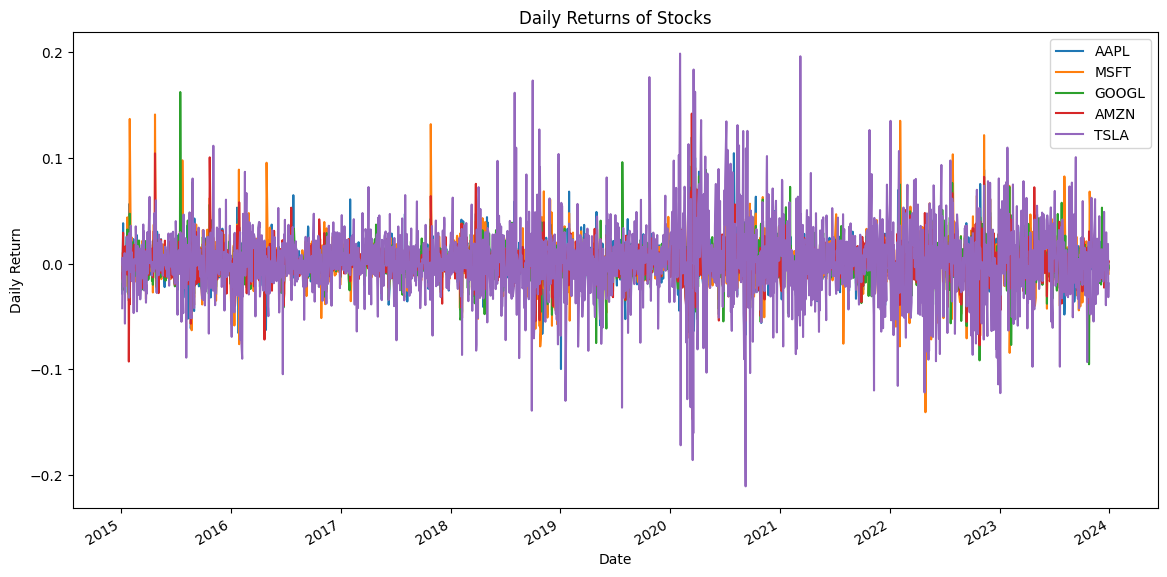

In [4]:
# Calculate daily returns
data_returns = data['Close'].pct_change().dropna()

# Plot daily returns
data_returns.plot(figsize=(14, 7))
plt.title('Daily Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(stocks)
plt.show()

## Feature Engineering

1. For each stock, create lag features and moving averages.
2. Display the first few rows of the processed data.

In [5]:
# Dictionary to store processed data
processed_data = {}

for stock in stocks:
    stock_data = data_returns[[stock]].dropna()
    stock_data['Lag1'] = stock_data[stock].shift(1)
    stock_data['Lag5'] = stock_data[stock].shift(5)
    stock_data['MA10'] = stock_data[stock].rolling(window=10).mean()
    stock_data = stock_data.dropna()
    processed_data[stock] = stock_data

# Display the first few rows of the processed data for one stock
processed_data['AAPL'].head()


Ticker,AAPL,Lag1,Lag5,MA10
Date,,,,
2015-01-16,-0.007770,-0.027140,0.001073,-0.002904
2015-01-20,0.025757,-0.007770,-0.024641,0.002489
2015-01-21,0.007634,0.025757,0.008879,0.003243
2015-01-22,0.026016,0.007634,-0.003811,0.004442
2015-01-23,0.005160,0.026016,-0.027140,0.001116


# RANDOM FOREST

## Model Training and Prediction

1. Initialize dictionaries to store models and predictions.
2. For each stock:
   a. Prepare features and target variables.
   b. Split data into training and testing sets.
   c. Train Random Forest model.
   d. Predict future returns.
   e. Store the model and predictions.

In [6]:
# Dictionaries to store models and predictions
models = {}
predictions = {}

for stock in stocks:
    stock_data = processed_data[stock]
    
    # Features and target
    X = stock_data[['Lag1', 'Lag5', 'MA10']]
    y = stock_data[stock]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Store the model and predictions
    models[stock] = model
    predictions[stock] = (y_test, y_pred)

## Portfolio Allocation

1. Calculate predicted returns for each stock.
2. Allocate weights based on predicted returns and other criteria.
3. Evaluate portfolio performance.

In [7]:
# Calculate predicted returns
predicted_returns = {stock: pred[1] for stock, pred in predictions.items()}

# Initialize portfolio allocation dictionary
portfolio_allocation = {}

for stock, pred in predicted_returns.items():
    avg_pred_return = pred.mean()
    portfolio_allocation[stock] = avg_pred_return

# Normalize weights so they sum up to 1
total_return = sum(portfolio_allocation.values())
portfolio_weights = {stock: ret / total_return for stock, ret in portfolio_allocation.items()}

# Display portfolio weights
portfolio_weights


{'AAPL': 0.14899102209435824,
 'MSFT': 0.22227300473737546,
 'GOOGL': 0.22375958253037256,
 'AMZN': 0.3864734893935603,
 'TSLA': 0.01850290124433335}

# XGBOOST

In [9]:
import xgboost as xgb

# Dictionaries to store models and predictions
xgb_models = {}
xgb_predictions = {}

for stock in stocks:
    stock_data = processed_data[stock]
    
    # Features and target
    X = stock_data[['Lag1', 'Lag5', 'MA10']]
    y = stock_data[stock]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Train the model
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Predict
    y_pred = xgb_model.predict(X_test)
    
    # Store the model and predictions
    xgb_models[stock] = xgb_model
    xgb_predictions[stock] = (y_test, y_pred)


In [11]:
# Calculate predicted returns
predicted_returns = {stock: pred[1] for stock, pred in xgb_predictions.items()}

# Initialize portfolio allocation dictionary
portfolio_allocation = {}

for stock, pred in predicted_returns.items():
    avg_pred_return = pred.mean()
    portfolio_allocation[stock] = avg_pred_return

# Normalize weights so they sum up to 1
total_return = sum(portfolio_allocation.values())
portfolio_weights = {stock: ret / total_return for stock, ret in portfolio_allocation.items()}

# Display portfolio weights
portfolio_weights

{'AAPL': 3.8410640230740904,
 'MSFT': 5.436526585221701,
 'GOOGL': 2.706145489545478,
 'AMZN': -8.15664970406151,
 'TSLA': -2.827086393779761}

# LSTM

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Dictionaries to store models and predictions
lstm_models = {}
lstm_predictions = {}

for stock in stocks:
    stock_data = processed_data[stock]
    
    # Features and target
    X = stock_data[['Lag1', 'Lag5', 'MA10']]
    y = stock_data[stock]
    
    # Scale the data
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
    
    # Reshape data for LSTM [samples, time steps, features]
    X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))
    
    # Split the data
    split = int(len(X_scaled) * 0.8)
    X_train, X_test = X_scaled[:split], X_scaled[split:]
    y_train, y_test = y_scaled[:split], y_scaled[split:]
    
    # Build the model
    lstm_model = Sequential()
    lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(LSTM(units=50, return_sequences=False))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(units=1))
    
    lstm_model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train the model
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=32)
    
    # Predict
    y_pred_scaled = lstm_model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    
    # Store the model and predictions
    lstm_models[stock] = lstm_model
    lstm_predictions[stock] = (scaler_y.inverse_transform(y_test), y_pred)

Epoch 1/50


/Users/faidhi/Documents/Programming Training/WQU Capstone/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1947  
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.0076
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.0078
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0075
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - loss: 0.0080
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 0.0065
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.0074
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 0.0066
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.0066
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.0064
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 0.0063
Epoch 16

/Users/faidhi/Documents/Programming Training/WQU Capstone/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1684  
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0068
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.0058
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.0059
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.0051
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 0.0057
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.0053
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.0050
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - loss: 0.0045
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.0050
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0052
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0045
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0054
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.0046
Epoc

/Users/faidhi/Documents/Programming Training/WQU Capstone/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1090  
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0050
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.0050
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.0049
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 0.0049
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0047
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.0051
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - loss: 0.0045
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.0044
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - loss: 0.0045
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.0041
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.0047
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0038
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0039
Ep

/Users/faidhi/Documents/Programming Training/WQU Capstone/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1641  
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.0079
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.0075
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.0066
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.0069
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 0.0068
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.0064
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.0068
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0059
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.0061
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - loss: 0.0061
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0066
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.0060
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 0.0054
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.0057


/Users/faidhi/Documents/Programming Training/WQU Capstone/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1735  
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 0.0101
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 0.0106
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - loss: 0.0092
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - loss: 0.0101
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.0096
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.0091
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.0086
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 0.0082
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - loss: 0.0084
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 0.0076
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.0092
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.0078
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.0091
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 0.0086


In [12]:
# Calculate predicted returns
predicted_returns = {stock: pred[1] for stock, pred in lstm_predictions.items()}

# Initialize portfolio allocation dictionary
portfolio_allocation = {}

for stock, pred in predicted_returns.items():
    avg_pred_return = pred.mean()
    portfolio_allocation[stock] = avg_pred_return

# Normalize weights so they sum up to 1
total_return = sum(portfolio_allocation.values())
portfolio_weights = {stock: ret / total_return for stock, ret in portfolio_allocation.items()}

# Display portfolio weights
portfolio_weights

{'AAPL': 0.44742062421851464,
 'MSFT': 0.4283338282611612,
 'GOOGL': 0.36540461950610054,
 'AMZN': -0.43748939199216574,
 'TSLA': 0.1963303200063894}